## Exploratory Analysis

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

aisles=pd.read_csv('/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv( '/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/departments.csv')
products = pd.read_csv( '/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/products.csv')
orders = pd.read_csv('/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/orders.csv')
order_products__train = pd.read_csv('/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/order_products__train.csv')
order_products__prior = pd.read_csv('/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/order_products__prior.csv')
sample_submission = pd.read_csv( '/Users/pengchengli/Desktop/255/team project/instacart-market-basket-analysis/sample_submission.csv')

In [86]:
aisles.shape

(134, 2)

In [87]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [88]:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [89]:
departments.shape

(21, 2)

In [90]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [91]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [92]:
products.shape

(49688, 4)

In [93]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [94]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [95]:
orders.shape

(3421083, 7)

In [96]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [97]:
# number of eval_set
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

<BarContainer object of 3 artists>

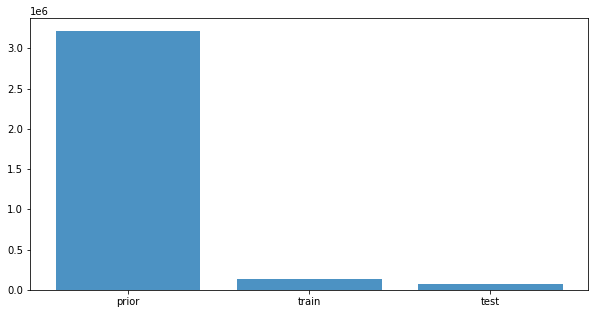

In [98]:
# eval_set
color = sns.color_palette()
type(orders['eval_set'].value_counts())
eval_set_info=orders['eval_set'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(eval_set_info.index,eval_set_info.values,color=color[0],alpha=0.8)

In [ ]:
# order_dow
plt.figure(figsize=(7,5))
sns.countplot(x='order_dow',data=orders,color =color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of orders by day of week",fontsize=15)
plt.show()

In [ ]:
# order_hour_of_day
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day',data=orders,color=color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Hour of Day',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Orders count by hour of day",fontsize=15)
plt.show()

In [ ]:
# days_since_prior_order
plt.figure(figsize=(10,5))
sns.countplot(x="days_since_prior_order",data=orders,color=color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Days since prior order',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Days since prior order",fontsize=15)
plt.show()

In [ ]:
print('users_total: '+str(orders['user_id'].nunique()))
count_orders = orders.groupby('user_id')['order_number'].max().reset_index()
count_orders = count_orders['order_number'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count_orders.index,count_orders.values,alpha=0.7,color=color[0])
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Orders number per User', fontsize = 12)
plt.show()

In [ ]:
order_num_info=orders.groupby("user_id")["order_number"].agg(np.max).reset_index()
order_num_info_data=order_num_info.order_number.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(order_num_info_data.index,order_num_info_data.values)
plt.show()